# External

Toutes les séries temporelles ont une fréquence quotidienne (1 point=1 jour).
Les données sont fournies sous forme de csv, une colonne correspondant à la date, et les autres correspondant aux différentes séries temporelles

### Fichier external.csv
Ce fichier contient 2 séries temporelles, concernant des données qui ne sont pas issues de la blockchain Bitcoin, mais qui concernent l'économie Bitcoin: 
* `PriceUSD`: la valeur moyenne observée d'un Bitcoin en US dollar sur la journée sur les principales plateformes d'échange
* `HashRate`: Le HashRate (Taux de hachage), une mesure de la puissance de calcul totale utilisée par les miners https://en.bitcoinwiki.org/wiki/Hashrate


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [6]:
ds = pd.read_csv('../../timeseries/external.csv')
ds

,Unnamed: 0,date,PriceUSD,HashRate
0,2190,2015-01-02,315.942732,3.333450e+05
1,2191,2015-01-03,285.647310,3.272842e+05
2,2192,2015-01-04,263.334575,3.474869e+05
3,2193,2015-01-05,275.003852,3.151626e+05
4,2194,2015-01-06,287.549521,3.192031e+05
...,...,...,...,...
906,3096,2017-06-26,2426.365051,5.023770e+06
907,3097,2017-06-27,2530.345536,4.634604e+06
908,3098,2017-06-28,2562.792264,5.554450e+06
909,3099,2017-06-29,2540.443032,4.245439e+06


In [7]:
ds = ds.drop(columns='Unnamed: 0')

### Calcul de l'évolution du HashRate au fil du temps (2 ans)

Comparaison entre la première valeur relevée le 2015/01/02 et la dernière 2017/03/12

<Axes: xlabel='date'>

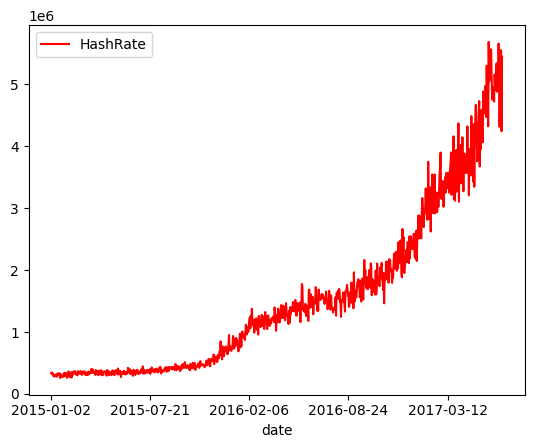

In [8]:
ds.plot(x ='date', y ='HashRate', color = 'red')

In [9]:
evolution = ((ds.HashRate.iloc[-1] - ds.HashRate.iloc[0]) / ds.HashRate.iloc[0]) * 100
evolution

1534.4367843338666

Le calcul ci-dessus sur les données du HashRate nous montre que la puissance de calcul des mineurs de la blockchain a augmenté de **1500%** en deux ans.
Cela traduit surement l'augmentation du nombre d'acteurs pour le minage.

### Analyse du PriceUSD

<Axes: xlabel='date'>

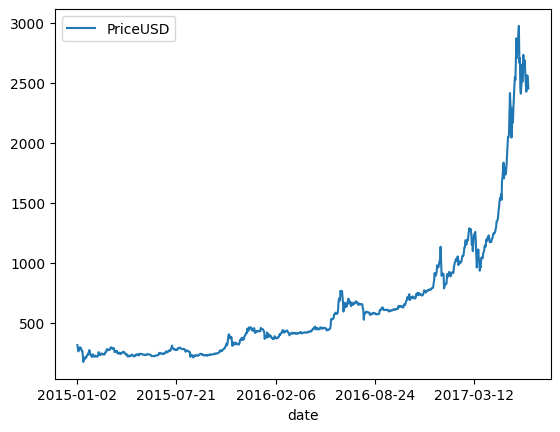

In [10]:
ds.plot(x ='date', y ='PriceUSD')

### PriceUsd and Hashrate

<Figure size 640x480 with 0 Axes>

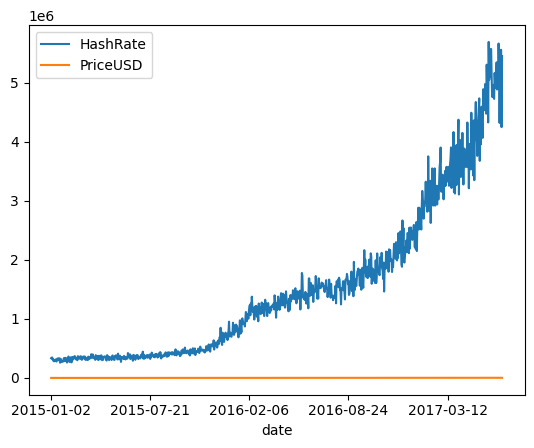

In [18]:
plt.figure()
ds.plot(x ='date', y =['HashRate','PriceUSD'])
plt.show()

In [47]:
hashrate_scaled = preprocessing.MinMaxScaler().fit_transform(ds[['HashRate']])
hashrate_scaled = hashrate_scaled.flatten().tolist()
hashrate_scaled

[0.013889264352381053,
 0.012773044407060861,
 0.016493777558128232,
 0.010540604516420665,
 0.011284751146634062,
 0.004587431474712918,
 0.00719194468046009,
 0.004587431474712918,
 0.00719194468046009,
 0.010168531201313877,
 0.0061548908113346484,
 0.0036230974047633535,
 0.01086929221428986,
 0.013284690484132042,
 0.00845389394444769,
 0.0080513275661407,
 0.014089823240746216,
 0.01046672583598287,
 0.0,
 0.012479557727518041,
 0.006843628431219516,
 0.002415398269842349,
 0.0032205310264563497,
 0.002817964648149353,
 0.0036230974047633535,
 0.010972384224538126,
 0.014465980377718325,
 0.014465980377718325,
 0.004641656362677944,
 0.015221697609644473,
 0.011065252834050444,
 0.012576687297902935,
 0.00048521158708372814,
 0.012576687297902935,
 0.012576687297902935,
 0.019378142385238682,
 0.012576687297902935,
 0.0023745046668992922,
 0.015226283094223879,
 0.01110447749342374,
 0.016802410423084398,
 0.0009295972618866277,
 0.011918467911946715,
 0.01761640084160738,
 0.009

In [45]:
price_scaled = preprocessing.MinMaxScaler().fit_transform(ds[['PriceUSD']])
price_scaled = price_scaled.flatten().tolist()
price_scaled

[0.050134441629973506,
 0.03930914618298205,
 0.03133626010589263,
 0.03550597817260309,
 0.03998885281076152,
 0.043557110684867145,
 0.03884286709821411,
 0.04175817831315473,
 0.0359443011602508,
 0.033273294833025505,
 0.03322388276968581,
 0.017319687332302214,
 0.0,
 0.013115012344757038,
 0.01141921956012297,
 0.008642676898757862,
 0.012683188234972137,
 0.014742154871401,
 0.012964522462766567,
 0.0186761241022175,
 0.020728300111935896,
 0.020544445815076598,
 0.026243510712101306,
 0.02818586124106362,
 0.03513021338451948,
 0.031843385595559964,
 0.02147455711606029,
 0.020839067354629065,
 0.01903058266203675,
 0.01489847043697494,
 0.01839279827608327,
 0.02303126954967523,
 0.018630202687486372,
 0.018274821474548356,
 0.014783767508598555,
 0.01682545455206863,
 0.018941586524439558,
 0.017293913921707524,
 0.016126358007708175,
 0.01616911560772226,
 0.015671614697417596,
 0.016774806889549257,
 0.021767392868646318,
 0.029297052614364064,
 0.02101359519057852,
 0.0212

In [48]:
df_scaled = pd.DataFrame(data={'date': ds['date'].values.tolist(), 'price': price_scaled, 'hashrate': hashrate_scaled})
df_scaled 

,date,price,hashrate
0,2015-01-02,0.050134,0.013889
1,2015-01-03,0.039309,0.012773
2,2015-01-04,0.031336,0.016494
3,2015-01-05,0.035506,0.010541
4,2015-01-06,0.039989,0.011285
...,...,...,...
906,2017-06-26,0.804240,0.877724
907,2017-06-27,0.841395,0.806051
908,2017-06-28,0.852989,0.975459
909,2017-06-29,0.845003,0.734379


<Figure size 640x480 with 0 Axes>

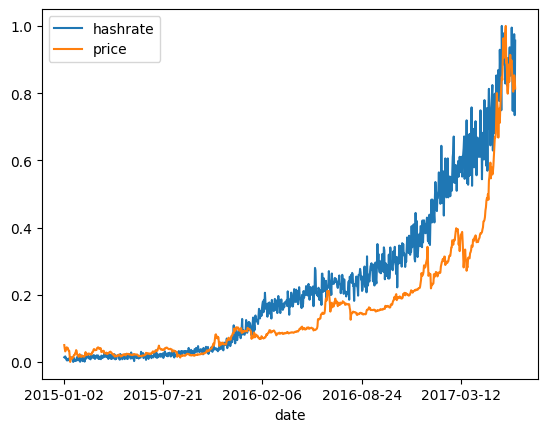

In [49]:
plt.figure()
df_scaled.plot(x ='date', y =['hashrate','price'])
plt.show()

In [31]:
len(hashrate_scaled)

911

In [32]:
len(ds['date'].values)

911

In [33]:
len(price_scaled)

911

In [36]:
ds['date'].values.tolist()

['2015-01-02',
 '2015-01-03',
 '2015-01-04',
 '2015-01-05',
 '2015-01-06',
 '2015-01-07',
 '2015-01-08',
 '2015-01-09',
 '2015-01-10',
 '2015-01-11',
 '2015-01-12',
 '2015-01-13',
 '2015-01-14',
 '2015-01-15',
 '2015-01-16',
 '2015-01-17',
 '2015-01-18',
 '2015-01-19',
 '2015-01-20',
 '2015-01-21',
 '2015-01-22',
 '2015-01-23',
 '2015-01-24',
 '2015-01-25',
 '2015-01-26',
 '2015-01-27',
 '2015-01-28',
 '2015-01-29',
 '2015-01-30',
 '2015-01-31',
 '2015-02-01',
 '2015-02-02',
 '2015-02-03',
 '2015-02-04',
 '2015-02-05',
 '2015-02-06',
 '2015-02-07',
 '2015-02-08',
 '2015-02-09',
 '2015-02-10',
 '2015-02-11',
 '2015-02-12',
 '2015-02-13',
 '2015-02-14',
 '2015-02-15',
 '2015-02-16',
 '2015-02-17',
 '2015-02-18',
 '2015-02-19',
 '2015-02-20',
 '2015-02-21',
 '2015-02-22',
 '2015-02-23',
 '2015-02-24',
 '2015-02-25',
 '2015-02-26',
 '2015-02-27',
 '2015-02-28',
 '2015-03-01',
 '2015-03-02',
 '2015-03-03',
 '2015-03-04',
 '2015-03-05',
 '2015-03-06',
 '2015-03-07',
 '2015-03-08',
 '2015-03-